<a href="https://colab.research.google.com/github/jpzorrilla/ML_notebooks/blob/main/Tutorial_SeriesTemporales_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Contenido
1. Introducción
2. Serie de tiempo
3. Minería de datos en serie de tiempo
4. Preprocesamiento de series de tiempo
5. Transformación de series de tiempo
6. Clasificación de series de tiempo
7. Predicción de series de tiempo
8. Trabajo de investigación realizado
9. Trabajo futuro

# Introducción
- Este webinar tiene como objetivo mostrar conceptos y técnicas para procesar series de tiempo y de esta forma, extraer información relevante de ellas.
- Además, se incluirán pequeños ejemplos prácticos de métodos para procesar series temporales utilizando en lenguaje de programación Python considerado como uno de los lenguajes más utilizados en análisis de datos.
- Principalmente, este mini tutorial se enfocará a técnicas de aprendizaje automático e inteligencia artificial, mencionando sólo las técnicas estadísticas que son utilizados en estos últimos.
- Así mismo, se presentará el trabajo de investigación realizado hasta el momento en esta rama y en el que se está trabajando.
- Al final, se espera que se tengan bases para implementar algunas de estas técnicas a un problema del interés de la audiencia.

## Parte práctica
- Se usará una serie de tiempo obtenida de [1], que contiene el histórico de precios de Amazon, inc, del 26 de abril de 2022 al 26 de abril de 2023, considerando sólo en el precio de cierre ajustado ajustado por splits y distribuciones de dividendos y/o ganancias de capital.
- Para la clasificación, usaremos la base de datos SharePriceIncrease de los repositorios de la UEA y UCR [4]
- Las librerías o bibliotecas a ocupar de python son:

In [ ]:
pip install matplotlib # https://matplotlib.org/stable/users/getting_started/index.html#installation-quick-start
pip install numpy # https://numpy.org/install/
pip install pandas # https://pandas.pydata.org/docs/getting_started/install.html
pip install sklearn # https://scikit-learn.org/stable/install.html
pip install tslearn # https://tslearn.readthedocs.io/en/stable/installation.html
pip install sktime # http://www.sktime.net/en/latest/installation.html#
pip install keras # https://techvidvan.com/tutorials/keras-installation/

[1] [Yahoo Finance](https://finance.yahoo.com/quote/AMZN/history?period1=1650950362&period2=1682493562&interval=1wk&filter=history&frequency=1wk&includeAdjustedClose=true), fecha de consulta: 25/04/2023.

[4] [UEA and UCR Time Series Classification Repository](http://timeseriesclassification.com/description.php?Dataset=SharePriceIncrease), última visita: 26/04/2023.

# Series de Tiempo
- Lo que distingue a las series temporales de otros datos es que el análisis puede mostrar cómo cambian las variables con el tiempo.
- El tiempo es una variable crucial porque muestra cómo se ajustan los datos a lo largo de los puntos, así como permite observar la tendencia o patrones que presentan.
- Al encontrar estas características, el tomador de decisiones puede generar estrategías para beneficio del dueño de la información.
- Sin embargo, hoy en día, la cantidad de información generada incrementa a pasos agigantados, haciendo que las series de tiempo sean de alta dimensionalidad.
- Por lo que, encontrar dichos patrones con métodos estadísticos tradicionales se convierte en una tarea no trivial.
- Pero no todo esta perdido, podemos usar otro tipo de modelos que permitan extraer conocimiento (oro) a partir de este tipo de dato: La minería de datos.

## Características de las series de tiempo
- Estacionalidad o temporalidad. Esta característica se presenta cuando existen patrones repetitivos o ciclos de comportamiento a lo largo del tiempo [16].
- Tendencia. Se puede definir como un cambio a lo largo del tiempo que presenta la serie de tiempo con respecto de la media [16].
- Estacionariedad y No Estacionariedad. Una serie de tiempo es estacionaria cuando no varia su media y varianza a lo largo del tiempo, es decir, se mantiene constante. Cuando una serie de tiempo no cumple con esto, se dice que es <em>no estacionaria [16].

[16] Mills, T. C. (2019). Applied time series analysis: A practical guide to modeling and forecasting. Academic press.

# Minería de datos en serie de tiempo
- La minería de datos (MD) es el proceso de extraer conocimiento útil y comprensible, previamente desconocido, desde grandes cantidades de datos almacenados en distintos formatos [2].
- Por lo tanto, la minería de datos temporal es el uso de la minería de datos tradicional usando datos temporales, es decir, series de tiempo.
- Para encontrar oro, MD usa una serie de pasos e incorpora técnicas de los campos de aprendizaje automático, estadística, inteligencia artificial, entre otros.

[2] Orallo, J. H., Quintana, M. J. R., and Ramírez, C. F. (2004). Introducción a la Minería de Datos. Pearson Educación.

# Preprocesamiento de series de tiempo

## Datos faltantes
Los datos faltantes pueden deberse a errores de manipulación, falla en el registro de datos, condiciones ambientales, etc.
Existen dos estrategias para resolverlos [3]:
1. No rellenar. Implicaría dejar tal cuál la serie de tiempo y utilizar técnicas que puedan manejar esta situación.
2. Rellenar con un estimado. Se usa la interpolación de datos para crear una estimación usando los valores adyacentes a los datos faltantes. Cuanto mayor sea la distancia entre los valores adyacentes mayor será el error de interpolación.

[3] Mitsa, T. (2010). Temporal data mining. CRC press.

       2010  2011  2012  2013  2014  2015  2016  2017
Sales   5.0   4.0   NaN   2.0   1.0   NaN   0.0   1.0
       2010  2011  2012  2013  2014  2015  2016  2017
Sales   5.0   4.0   3.0   2.0   1.0   0.5   0.0   1.0


Text(0.5, 1.0, 'Serie de tiempo interpolada')

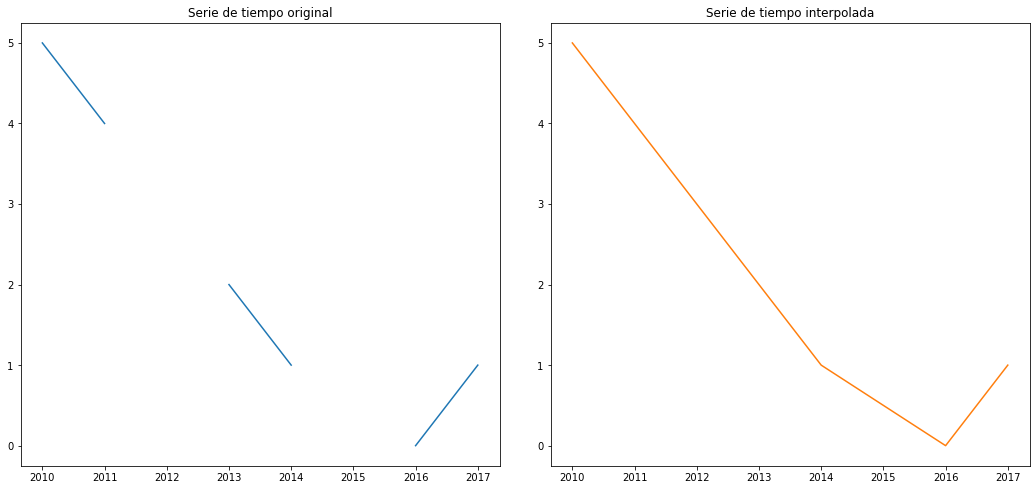

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

time_index = [2010,2011,2012,2013,2014,2015,2016,2017]

df = pd.DataFrame(index=time_index);
df["Sales"] = [5.0,4.0,np.nan,2.0,1.0,np.nan,0.0,1.0];
print(df.T)
df1= df.interpolate(); #Aplicamos interpolacion, method='Linear'
print(df1.T)

fig, axs = plt.subplots(1, 2, figsize=(15,7))
fig.tight_layout(pad=2.0)
axs[0].plot(df);
axs[0].set_title('Serie de tiempo original')
axs[1].plot(df1, 'tab:orange')
axs[1].set_title('Serie de tiempo interpolada')

# Preprocesamiento de series de tiempo
## Eliminación de ruido
- El ruido se define como un error aleatorio que ocurre en el proceso de minería de datos.
- Puede deberse a varios factores, como equipos de medición defectuosos y factores ambientales [3].

[3] Mitsa, T. (2010). Temporal data mining. CRC press.


### Método de suavizado moving-average
- El método de suavizado Moving-average (o rolling-average) se usa con frecuencia en finanzas para suavizar las fluctuaciones a corto plazo en los precios de las acciones.
- Éste método promedia un cierto número de puntos (dado por una ventana) para obtener el valor del punto suavizado.
- La librería pandas de python tiene una implementación de este método, usando el método rolling.

[]

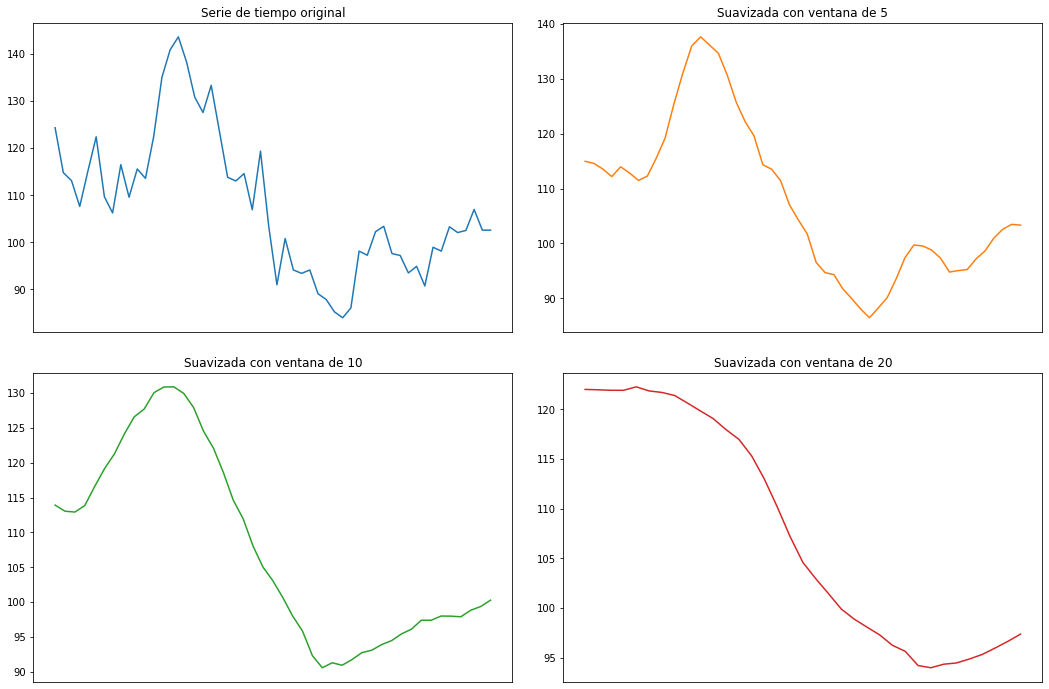

In [ ]:
import pandas
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

df_amzn = pandas.read_csv('AMZN.csv', encoding='utf-8')
df_amzn.set_index('Date', inplace=True)

# Rolling hace el suavizado por movimiento del promedio
suavizado5 = df_amzn['Adj Close'].rolling(5, center=True).mean() #ventana=5
suavizado10 = df_amzn['Adj Close'].rolling(10, center=True).mean() #ventana=10
suavizado20 = df_amzn['Adj Close'].rolling(20, center=True).mean() #ventana=20

fig, axs = plt.subplots(2, 2, figsize=(15,10))
fig.tight_layout(pad=2.0)
axs[0, 0].plot(df_amzn['Adj Close']);
axs[0, 0].set_title('Serie de tiempo original')
axs[0, 0].set_xticks([], []) 
axs[0, 1].plot(suavizado5, 'tab:orange')
axs[0, 1].set_title('Suavizada con ventana de 5')
axs[0, 1].set_xticks([], []) 
axs[1, 0].plot(suavizado10, 'tab:green')
axs[1, 0].set_title('Suavizada con ventana de 10')
axs[1, 0].set_xticks([], []) 
axs[1, 1].plot(suavizado20, 'tab:red')
axs[1, 1].set_title('Suavizada con ventana de 20')
axs[1, 1].set_xticks([], [])

## Normalización de series de tiempo
- En la normalización de series de tiempo, los datos se escalan para que se encuentren dentro de un rango preespecificado, como [0–1].
- La normalización permite transformar los datos a la misma “escala” y, por lo tanto, permite realizar comparaciones directas entre sus valores.- Podemos encontrar dos tipos de métodos de normalización [3]:
1. Normalización min-max. Este método se obtiene usando el valor mínimo y máximo de la serie de tiempo: $$ x_{norm} = \frac{x-x{min}}{x_{max}-x_{min}}$$
2. Normalización z-score (Estandarización). En esta técnica se usa la media y la desviación estandar para normalizar la serie temporal: $$ x_{norm} = \frac{x-\mu}{\sigma}$$

[3] Mitsa, T. (2010). Temporal data mining. CRC press.

[]

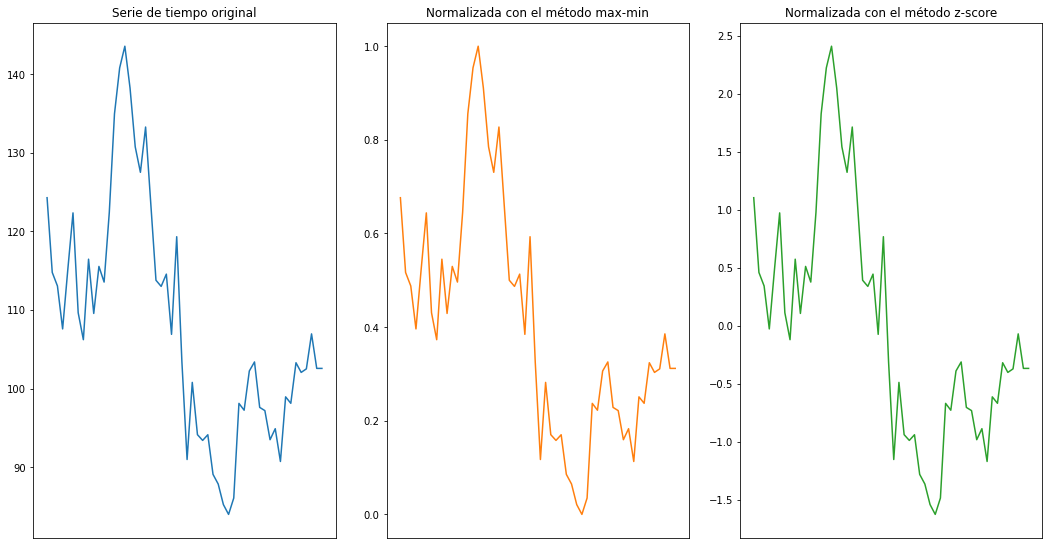

In [ ]:
# Normalize time series data
from pandas import read_csv
from tslearn.preprocessing import TimeSeriesScalerMeanVariance, TimeSeriesScalerMinMax
from math import sqrt
import matplotlib.pyplot as plt

df_amzn = read_csv('AMZN.csv', encoding='utf-8')
df_amzn.set_index('Date', inplace=True)

# preparación de los datos
values = df_amzn['Adj Close'].values
values = values.reshape((1, len(values)))

# Entrenar la normalizacion max-min
scaler_minmax = TimeSeriesScalerMinMax(value_range=(0., 1.))
normalized_minmax = scaler_minmax.fit_transform(values).flatten()

# Entrenar la normalizacion z-score
scaler_zscore = TimeSeriesScalerMeanVariance(mu=0., std=1.)  # Rescale time series
normalized_zscore = scaler_zscore.fit_transform(values).flatten()

fig, axs = plt.subplots(1, 3, figsize=(15,8))
fig.tight_layout(pad=2.0)
axs[0].plot(df_amzn['Adj Close']);
axs[0].set_title('Serie de tiempo original')
axs[0].set_xticks([], []) 
axs[1].plot(normalized_minmax, 'tab:orange')
axs[1].set_title('Normalizada con el método max-min')
axs[1].set_xticks([], []) 
axs[2].plot(normalized_zscore, 'tab:green')
axs[2].set_title('Normalizada con el método z-score')
axs[2].set_xticks([], []) 

# Transformación de series de tiempo
## Discretización de series de tiempo
Uno de los principales problemas que se enfrenta la minería de datos temporal es la alta dimensionalidad de las series de tiempo, lo cual conlleva a modelos costosos computacionalmente.

- Una de las transformaciones que podemos usar para disminuir el tamaño de las series temporales es la Discretización de series de tiempo.
- Discretizar significa convertir datos continuos a datos discretos.
- Podemos discretizar series de tiempo convirtiendola en una serie de caracteres (cadenas de texto). A este proceso se le conoce como Discretización simbólica.
- Symbolic Aggregate approXimation (SAX) es uno de los métodos más popular de discretización simbólica.
- Este método utiliza otro algoritmo de reducción de dimensionalidad llamado Piecewise Aggregate Approximation (PAA).

A continuación se muestra el código de PAA y SAX para la serie de tiempo de Amazon.

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


Text(0.5, 1.0, 'SAX, cadena obtenida HGJIDACBD')

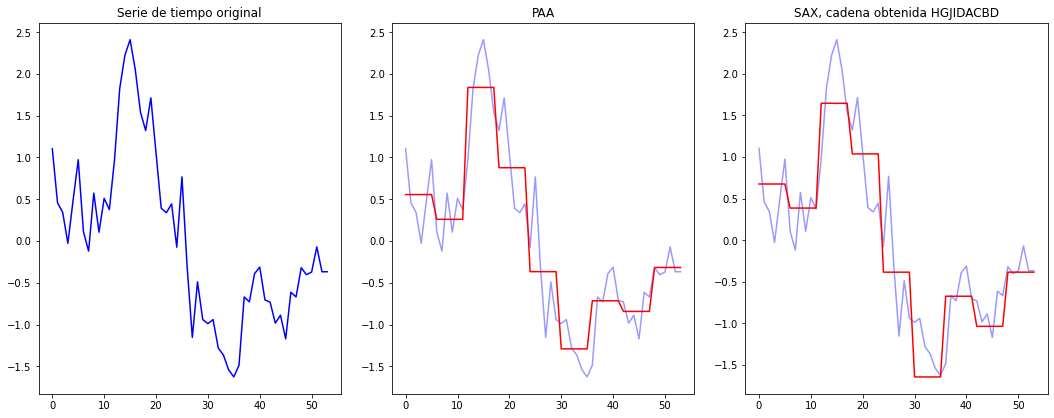

In [ ]:
import numpy
import pandas
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from tslearn.piecewise import PiecewiseAggregateApproximation
from tslearn.piecewise import SymbolicAggregateApproximation

df_amzn = pandas.read_csv('AMZN.csv', encoding='utf-8')
df_amzn.set_index('Date', inplace=True)

# preparación de los datos
values = df_amzn['Adj Close'].values
values = values.reshape((1, len(values)))

scaler = TimeSeriesScalerMeanVariance(mu=0., std=1.)  # Rescale time series
dataset = scaler.fit_transform(values)

# Transformación PAA
n_paa_segments = 9
paa = PiecewiseAggregateApproximation(n_segments=n_paa_segments)
paa_dataset_inv = paa.inverse_transform(paa.fit_transform(dataset)) # obtiene los coeficientes de PAA y los transforma en serie de tiempo reconstruida

# Transformación con SAX
n_sax_symbols = 10
sax = SymbolicAggregateApproximation(n_segments=n_paa_segments,
                                     alphabet_size_avg=n_sax_symbols)

sax_r = sax.fit_transform(dataset).flatten();
string = ''.join(chr(i+65) for i in sax_r)
sax_dataset_inv = sax.inverse_transform(sax.fit_transform(dataset))

fig, axs = plt.subplots(1, 3, figsize=(15,6))
fig.tight_layout(pad=2.0)
axs[0].plot(dataset[0].ravel(), "b-") #Original
axs[0].set_title("Serie de tiempo original")

axs[1].plot(dataset[0].ravel(), "b-", alpha=0.4)
axs[1].plot(paa_dataset_inv[0].ravel(), "r-")
axs[1].set_title("PAA")

axs[2].plot(dataset[0].ravel(), "b-", alpha=0.4)
axs[2].plot(sax_dataset_inv[0].ravel(), "r-")
axs[2].set_title("SAX, cadena obtenida %s" % string)


# Clasificación de series de tiempo

- La clasificación es la tarea de asignar una etiqueta de clase previamente conocida a un nuevo caso.
- Dado que se conocen las etiquetas de clases reales, los modelos de clasificación aprenden a identificar las características de los casos para distinguir entre cada etiqueta de clase, para que, cuando se presente un nuevo cao, el modelo le asigne la etiqueta que le corresponde.
- A esto se le conoce como aprendizaje supervisado. Por lo general, el conocimiento del problema (la asignación de etiquetas reales) es determinado por los expertos o dueños de la información.

- La tarea de clasificación de series temporales implica entrenar un modelo a partir de una colección de series temporales (conjunto de entrenamiento) para predecir una variable objetivo.
- Para validar el funcionamiento del modelo, se utiliza otro conjunto de series de tiempo (conjunto de prueba), no usadas en la fase de entrenamiento, para evaluar cuantas etiquetas colocó correctamente.
- Por ejemplo, podríamos querer construir un modelo que pueda predecir si un paciente está enfermo según la lectura del ECG, o predecir si un dispositivo fallará según la lectura de algún sensor.

## K vecino más cercano
- Se mide la similitud del nuevo caso con respecto de todos los casos conocidos.
- Se consideran sólo los k más parecido al nuevo caso.
- Se cuenta la etiqueta de los vecinos, y aquella de mayor frecuencia se toma como la etiqueta del nuevo caso.

Ratanamahatana, C., and Keogh, E.J. (2004). Making Time-Series Classification More Accurate Using Learned Constraints. SDM.

- Ejemplo de clasificación usando kNN con distancia euclidiana y un conjunto de series de tiempo obtenida de [4] llamada SharePriceIncrease.- El problema de este conjunto de datos es predecir si el precio de una acción mostrará un aumento excepcional después del anuncio trimestral de las ganancias por acción, en función del movimiento del precio de esa acción en los 60 días siguientes.
- Cada dato es el cambio porcentual del precio de cierre del día anterior.
- Cada caso es una serie de datos de 60 días.
- La clase objetivo se define como:
 - 0 = el precio no aumentó después de la publicación del informe de la empresa en más del 5 por ciento.
 - 1 = el precio aumentó después de la publicación del informe de la empresa en más del 5 por ciento.
- Hay 1931 casos, 1326 clase 0 y 605 clase 1.

[4] UEA and UCR Time Series Classification Repository: http://timeseriesclassification.com/description.php?Dataset=SharePriceIncrease (última visita: 26/04/2023).

Porcentaje de aciertos (accuracy):  0.6666666666666666


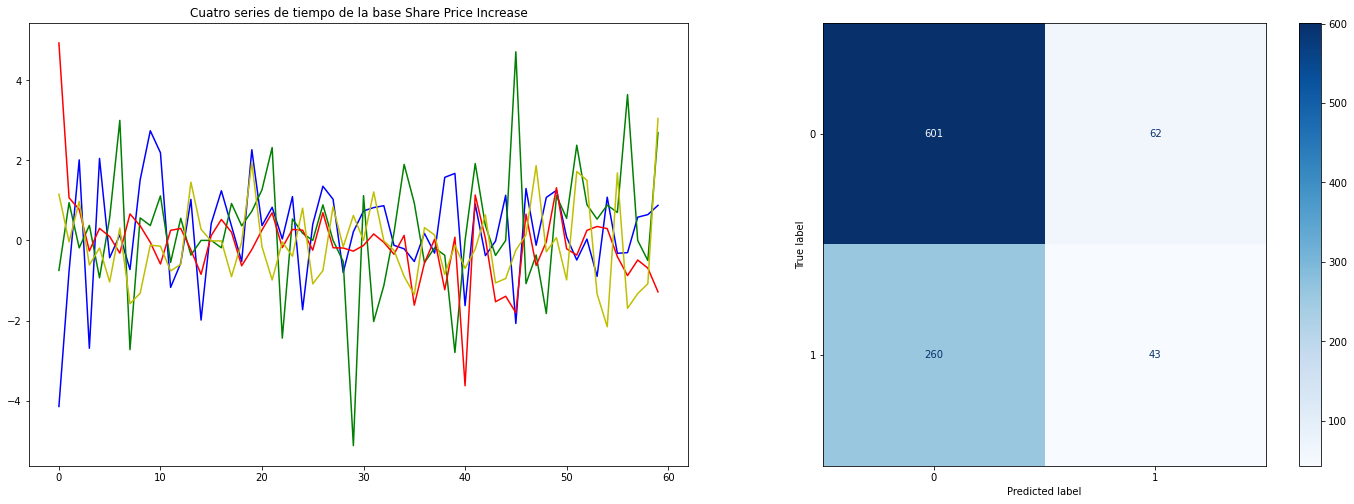

In [ ]:
from sktime.classification.distance_based import KNeighborsTimeSeriesClassifier
from sktime.datasets import load_from_tsfile
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#%matplotlib inline

X_train, y_train = load_from_tsfile("SharePriceIncrease_TRAIN.ts")
X_test, test_y = load_from_tsfile("SharePriceIncrease_TEST.ts")

classifier = KNeighborsTimeSeriesClassifier(distance="euclidean", n_neighbors=3)
classifier.fit(X_train, y_train)

np.set_printoptions(precision=2)

y_pred = classifier.predict(X_test)

print("Porcentaje de aciertos (accuracy): ", accuracy_score(test_y, y_pred))

fig, axs = plt.subplots(1, 2, figsize=(20,7))
fig.tight_layout(pad=2.0)
axs[0].plot(X_train.iloc[0, 0], "b-") #Original
axs[0].plot(X_train.iloc[1, 0], "g-") #Original
axs[0].plot(X_train.iloc[2, 0], "r-") #Original
axs[0].plot(X_train.iloc[3, 0], "y-") #Original
axs[0].set_title("Cuatro series de tiempo de la base Share Price Increase")

matrix = confusion_matrix(test_y, y_pred)
disp = ConfusionMatrixDisplay(matrix)
disp.plot(ax=axs[1], cmap=plt.cm.Blues)


- Ejemplo de clasificación usando kNN con distancia DTW y un conjunto de series de tiempo obtenida de [5] llamada GestureMidAirD1, el cual contiene series de tiempo de diferente longitud.
- Las series de tiempo contienen trayectorias manuales 3D recopiladas con el dispositivo Leap Motion.
- Hay 13 temas, cada uno realiza 26 gestos de comando de interfaz.
- Cada gesto se codifica como una secuencia de puntos 3D, que representan la posición del dedo índice dominante.
- Hay 26 clases que corresponden a gestos únicos.

[5] UEA and UCR Time Series Classification Repository: http://timeseriesclassification.com/description.php?Dataset=GestureMidAirD1 (última visita: 26/04/2023)

In [ ]:
#from tslearn.neighbors import KNeighborsTimeSeriesClassifier
from sktime.classification.distance_based import KNeighborsTimeSeriesClassifier
from sktime.datasets import load_UCR_UEA_dataset
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay
from sktime.dists_kernels.dtw import DtwDist
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sktime.transformations.panel.padder import PaddingTransformer

#%matplotlib inline

X_train_orig, y_train = load_UCR_UEA_dataset(name="GestureMidAirD1", split="train")
X_test_orig, test_y = load_UCR_UEA_dataset(name="GestureMidAirD1", split="test")

padding_transformer = PaddingTransformer()

X_train = padding_transformer.fit_transform(X_train_orig)
X_test = padding_transformer.fit_transform(X_test_orig)

#X_train = X_train.values.tolist()
#X_test = X_test.values.tolist()

#print(X_train)

classifier = KNeighborsTimeSeriesClassifier(n_neighbors=3, distance=DtwDist(derivative=False))
classifier.fit(X_train, y_train)

np.set_printoptions(precision=2)

y_pred = classifier.predict(X_test)

print("Porcentaje de aciertos (accuracy): ", accuracy_score(test_y, y_pred))

fig, axs = plt.subplots(1, 2, figsize=(20,7))
fig.tight_layout(pad=2.0)
axs[0].plot(X_train_orig.iloc[0, 0], "b-") #Original
axs[0].plot(X_train_orig.iloc[1, 0], "g-") #Original
axs[0].plot(X_train_orig.iloc[2, 0], "r-") #Original
axs[0].plot(X_train_orig.iloc[3, 0], "y-") #Original
axs[0].set_title("Cuatro series de tiempo de la base Share Price Increase")

matrix = confusion_matrix(test_y, y_pred)
disp = ConfusionMatrixDisplay(matrix)
disp.plot(ax=axs[1])

# Predicción de series de tiempo
- El objetivo de la predicción o pronóstico de series de tiempo es hacer predicciones precisas sobre el futuro [6].
- En el pronóstico de series de tiempo, los datos son datos históricos obtenidos a intervalos de tiempo regulares [3].
- La información sobre patrones pasados se puede utilizar para predecir patrones futuros [3].
- No hay que confundir la predicción de series de tiempo con la predicción de eventos.
- En la predicción de eventos tiene como objetivo predecir la ocurrencia de un evento o el número de ocurrencias de un evento o la duración de un evento dada la existencia de ciertas condiciones [3].
- El modelo de pronóstico, ya sea sobre la predicción de la duración de un evento o los valores de una serie de tiempo, se puede expresar de la siguiente manera:$$valor_{actual}=valor_{predicho}+residuo$$


[3] Mitsa, T. (2010). Temporal data mining. CRC press.

[6] Brownlee, J. (2017). Introduction to time series forecasting with python: how to prepare data and develop models to predict the future. Machine Learning Mastery.


## Redes Neuronales Recurrentes (LSTM)
- Las redes neuronales artificiales están inspiradas en el funcionamiento de los sistemas nerviosos.
- Está conformada por neuronas de entrada, ocultas y salidas, agrupadas por capas.
- Cada una con funciones que permiten propagar el conocimiento entre capas y con pesos que son ajustados para que se dé el aprendizaje.

[7] Reyes-Cruz, J. L., Sánchez-Trujillo, M. G., & Mejía-Ramírez, R. (2019). Influencia De La Formación Universitaria En Las Actitudes Emprendedoras (The Influence of Higher Education on Entrepreneurial Attitudes). Revista CEA, 5(10).


- Las redes neuronales recurrentes (RNN, por sus siglas en inglés) están diseñadas para datos secuenciales como oraciones de texto, series de tiempo y otras secuencias discretas como secuencias biológicas.
- Cuando la red toma una decisión, considerará la entrada actual y también evaluará lo que ha aprendido de las entradas anteriores [8].
- Produce salidas y las copia de nuevo en la red.
- Una RNN habitual tiene una memoria a corto plazo. Por lo que, las entradas de una RNN son los datos actuales y los datos recientes [8].

[8] Dark, S. (2018). Aprendizaje Profundo: Una Introducción a Los Fundamentos del Aprendizaje Profundo Utilizando Python.

[9] Charu, C. A. (2018). Neural networks and deep learning: a textbook. doi: https://doi.org/10.1007/978-3-319-94463-0. Springer

- Las redes neuronales recurrentes LSTM (Memoria de corto y largo plazo) tienen una memoria mayor que una RNN [8].
- LSTM emplea varias puertas para decidir qué información conservar o descartar. 
- Además, agrega un estado de celda, que es como una memoria a largo plazo de LSTM.
- En el diagrama de la izquiera, la celda $c_t$ es la memoria a largo plazo, y la celda $h_t$ es la memoria a corto plazo.
- Ambas reciben esta información de la unidad recurrente LSTM anterior y pasan la actualización a la siguiente.

[8] Dark, S. (2018). Aprendizaje Profundo: Una Introducción a Los Fundamentos del Aprendizaje Profundo Utilizando Python.</p></td>

[10] LSTM Recurrent Neural Networks — How to Teach a Network to Remember the Past: https://towardsdatascience.com/lstm-recurrent-neural-networks-how-to-teach-a-network-to-remember-the-past-55e54c2ff22e (última visita: 26/04/2023)

- Para poder aplicar la predicción, primero debemos transformar la serie de tiempo en un problema supervisado, es decir, debemos tener variables predictoras y variables de respuesta.
- Al igual que en clasificación, dividmos las series temporales en entrenamiento y prueba.
- Posteriormente, aplicamos el método de deslizamiento de ventanas, el cual consiste en dividir cada conjunto en secuencias de tamaño dado (ventana), haciendo un desplazamiento para tener predictores y respuestas.
- Ejemplo de implementación de una red LSTM simple, usando la base de datos de AMZN.

2023-04-28 13:30:27.081397: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1/1 [==============================] - 0s 70ms/step


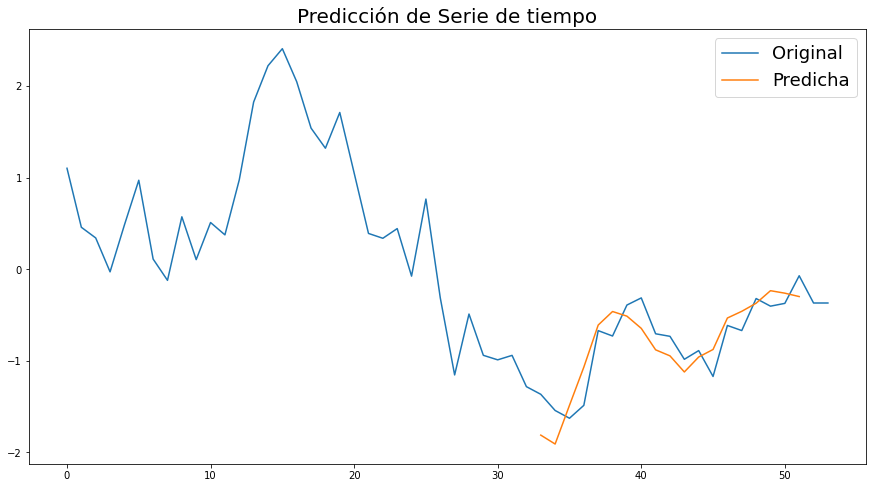

In [ ]:
import pandas
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from numpy import array, concatenate, empty, nan
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
import matplotlib.pyplot as plt

# separamos una secuencia univariada en muestras
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        end_ix = i + n_steps
        if end_ix > len(sequence)-1:
            break
        seq_x, seq_y = sequence[i:end_ix], sequence[i+1:end_ix+1]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

df_amzn = pandas.read_csv('AMZN.csv', encoding='utf-8')
df_amzn.set_index('Date', inplace=True)

# preparación de los datos
values = df_amzn['Adj Close'].values
values = values.reshape((1, len(values)))

scaler = TimeSeriesScalerMeanVariance(mu=0., std=1.)  # Rescale time series
raw_seq = scaler.fit_transform(values).flatten()

#subdividimos en train y test, dejando 60% de train y 40% de test
corte = int(len(raw_seq)*.60)
train = raw_seq[0:corte]
test = raw_seq[corte:len(raw_seq)]

#obtenemos las subsecuencias
n_steps = 3
train_X, train_y = split_sequence(train, n_steps)
test_X, test_y = split_sequence(test, n_steps)

# aplicamos LSTM
n_features = 1
# Trasformamos la secuencia de train_x para que sea de dimension (no_ts, longitud_ts, No_caracteristicas)
train_X = train_X.reshape((train_X.shape[0], train_X.shape[1], n_features))
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features))) 
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

model.fit(train_X, train_y, epochs=200, verbose=0)

#Predecimos los nuevos valores usando el conjunto de entrenamiento
yhat = model.predict(test_y, verbose=1)

#Para que se grfique desplazado agregamos valores nan al principio de la serie de tiempo
nans = empty((1,33))
nans[:] = nan
y_pred =concatenate((nans.flatten(), yhat.flatten()))

fig, axs = plt.subplots(1, 1, figsize=(15,8))
axs.plot(raw_seq, label='Original')
axs.plot(y_pred, label='Predicha')
axs.set_title("Predicción de Serie de tiempo", fontsize="20")
axs.legend(fontsize="18", loc ="best");

# Créditos

Este Notebook es parte del Webinar: *Procesamiento de series de tiempo usando técnicas de Inteligencia Artificial*, impartido por el **Dr. Aldo Márquez Grajales** del Instituto de Investigaciones en Inteligencia Artificial y Docente en el Instituto Tecnológico Superior de Xalapa.

Organizado por CAFRG - IIESCA - UV

Abril, 2023.

Xalapa, Veracruz, México.

# Trabajo de investigación realizado por el autor

## eMODiTS
- Dentro del trabajo de investigación que se ha realizado en esta rama, se encuentra el método llamado enhanced multi-objective symbolic discretization for time series (eMODiTS).
- Este método propone una discretización simbólica "flexible" basada en el método SAX.
- Dicha discretización consiste en tener múltiples cortes en la componente del tiempo de diferente tamaño, así como múltiple cortes de diferente tamaño para los valores de las series de tiempo.
- La decisión de que valores de cortes y cuántos realizar en cada componente de la serie temporal, es realizada por un algoritmo evolutivo multiobjetivo.
- Además, fue probado en tareas de clasificación de series de tiempo mediante el algoritmo de árboles de decisión que permitieron dar interpretabilidad al conjunto temporal.

[11] Márquez-Grajales, A., Acosta-Mesa, H. G., Mezura-Montes, E., & Graff, M. (2020). A multi-breakpoints approach for symbolic discretization of time series. Knowledge and Information Systems, 62(7), 2795-2834.

# Trabajo futuro
## Modelos subrogados

[13] Kocijan, J., Hvala, N., Perne, M., Mlakar, P., Grašič, B., and Božnar, M. Z. (2023). Surrogate modelling for the forecast of Seveso-type atmospheric pollutant dispersion. Stochastic Environmental Research and Risk Assessment, 37(1), 275-290.

## Predicción de sequía
[14] Servicio Meteorológico Nacional (SMN): https://smn.conagua.gob.mx/es/climatologia/monitor-de-sequia/monitor-de-sequia-en-mexico (última visita: 27/04/2023)


# Literatura recomendada
- Mills, T. C. (2019). Applied time series analysis: A practical guide to modeling and forecasting. Academic press.
- Brownlee, J. (2018). Deep learning for time series forecasting: predict the future with MLPs, CNNs and LSTMs in Python. Machine Learning Mastery.
- Tan, P. N., Steinbach, M., and Kumar, V. (2016). Introduction to data mining. Pearson Education India.
- Layton, R. (2015). Learning data mining with python. Packt Publishing Ltd.
- Charu, C. A. (2018). Neural networks and deep learning: a textbook.Springer.
- Eugene, C. (2019). Introduction to Deep Learning. MIT Press.
